In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sea 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

In [2]:
trainData=pd.read_csv('wineQualityRed_train.csv', sep=';')
testData=pd.read_csv('wineQualityRed_test.csv', sep=';')
dataTrain=trainData.copy()
dataTest=testData.copy()
print(dataTrain.shape)
print(dataTest.shape)

(1119, 12)
(480, 12)


In [3]:
dataTrain['quality']=(trainData['quality']>=7).astype(int)
dataTest['quality']=(testData['quality']>=7).astype(int)
X_train=dataTrain[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
Y_train=pd.DataFrame(dataTrain['quality'])
X_test=dataTest[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
Y_test=pd.DataFrame(dataTest['quality'])
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1119, 11)
(1119, 1)
(480, 11)
(480, 1)


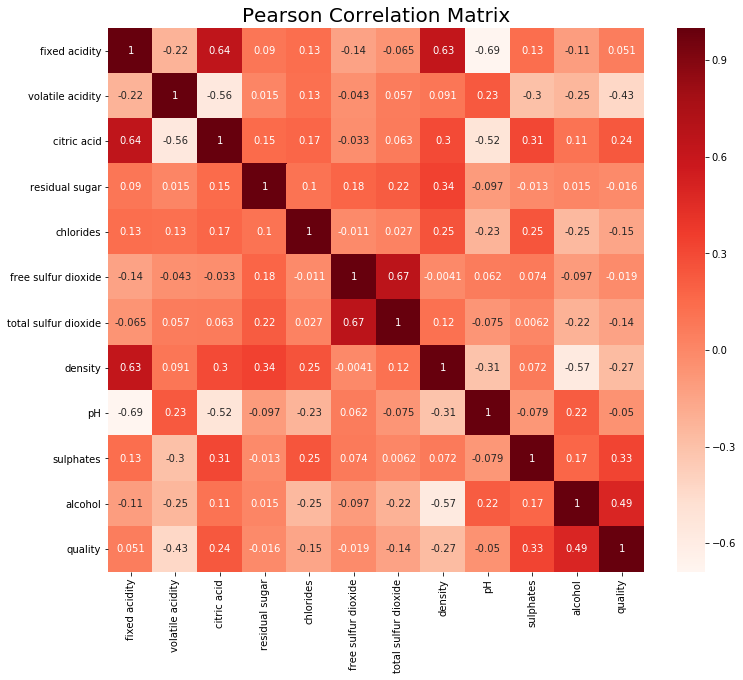

In [33]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
corr = trainData.corr()
sea.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.title("Pearson Correlation Matrix", fontsize=20)
plt.show()

In [32]:
#Correlation with output variable
corr_target = abs(corr['quality'])
#Selecting highly correlated features
relevant_features = corr_target[corr_target>0.3]
relevant_features

volatile acidity    0.426341
sulphates           0.325453
alcohol             0.492111
quality             1.000000
Name: quality, dtype: float64

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

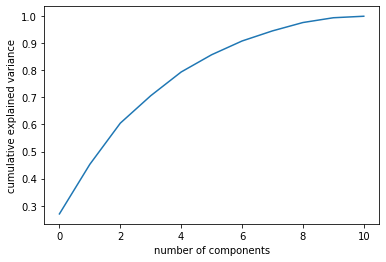

In [6]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [7]:
pca=PCA(0.90).fit(X_train_scaled)
pca.n_components_

7

In [8]:
from sklearn.decomposition import PCA

pca_7 = PCA(n_components=7)
pca_7.fit(X_train_scaled)
redwine_7_training = pca_7.transform(X_train_scaled)
redwine_7_testing = pca_7.transform(X_test_scaled)

pca_4 = PCA(n_components=4)
pca_4.fit(X_train_scaled)
redwine_4_training = pca_4.transform(X_train_scaled)
redwine_4_testing = pca_4.transform(X_test_scaled)

In [9]:
from sklearn.metrics import accuracy_score

regressor = LogisticRegression()

regressor.fit(redwine_7_training, Y_train)
redwine_7_predicted = regressor.predict(redwine_7_testing)
print('Accuracy score of Logistic Regression on 7 attributes: {}'.format(accuracy_score(Y_test, redwine_7_predicted)))

regressor.fit(redwine_4_training, Y_train)
redwine_4_predicted = regressor.predict(redwine_4_testing)
print('Accuracy score of Logistic Regression on 4 attributes: {}'.format(accuracy_score(Y_test, redwine_4_predicted)))

Accuracy score of Logistic Regression on 7 attributes: 0.875
Accuracy score of Logistic Regression on 4 attributes: 0.8708333333333333


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1, 'Confusion Matrix for Logistic Regression on 7 attributes')

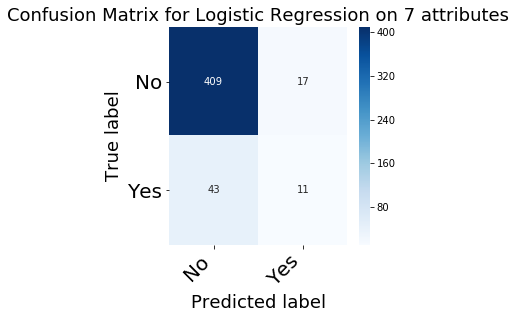

In [10]:
from sklearn.metrics import confusion_matrix

confusion_matrix_7_logistic = confusion_matrix(Y_test, redwine_7_predicted)
df_cm_7_logistic = pd.DataFrame(confusion_matrix_7_logistic, index=['No', 'Yes'], columns=['No', 'Yes'])
plt.figure(figsize=(4, 4))  
heatmap = sea.heatmap(df_cm_7_logistic, annot=True, cmap='Blues', fmt='g')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=20)
plt.ylabel('True label', fontsize=18)
plt.xlabel('Predicted label', fontsize=18)
plt.title('Confusion Matrix for Logistic Regression on 7 attributes', fontsize=18)

Text(0.5, 1, 'Confusion Matrix for Logistic Regression on 4 attributes')

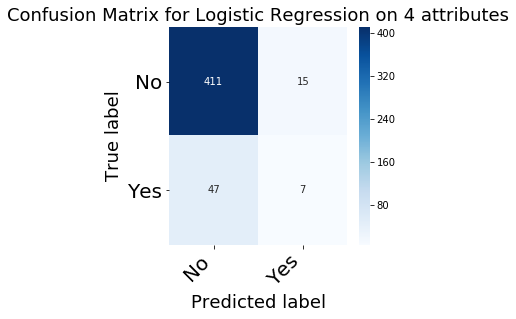

In [11]:
confusion_matrix_4_logistic = confusion_matrix(Y_test, redwine_4_predicted)
df_cm_4_logistic = pd.DataFrame(confusion_matrix_4_logistic, index=['No', 'Yes'], columns=['No', 'Yes'])
plt.figure(figsize=(4, 4))  
heatmap = sea.heatmap(df_cm_4_logistic, annot=True, cmap='Blues', fmt='g')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=20)
plt.ylabel('True label', fontsize=18)
plt.xlabel('Predicted label', fontsize=18)
plt.title('Confusion Matrix for Logistic Regression on 4 attributes', fontsize=18)

In [12]:
from sklearn.metrics import classification_report
print('Classification Report for Logistic Regression on 7 attributes: ')
print(classification_report(Y_test, redwine_7_predicted))

total=sum(sum(confusion_matrix_7_logistic))
accuracy=(confusion_matrix_7_logistic[0,0]+confusion_matrix_7_logistic[1,1])/total
sensitivity = confusion_matrix_7_logistic[1,1]/(confusion_matrix_7_logistic[1,0]+confusion_matrix_7_logistic[1,1])
specificity = confusion_matrix_7_logistic[0,0]/(confusion_matrix_7_logistic[0,0]+confusion_matrix_7_logistic[0,1])
recall=confusion_matrix_7_logistic[1,1]/(confusion_matrix_7_logistic[1,0]+confusion_matrix_7_logistic[1,1])
precision=confusion_matrix_7_logistic[1,1]/(confusion_matrix_7_logistic[0, 1]+confusion_matrix_7_logistic[1,1])
fScore=2*(precision*recall)/(precision+recall)

print('Evaluation Metrics for Logistic Regression: ')
print()
print ('Accuracy : ', accuracy)
print('Sensitivity : ', sensitivity )
print('Specificity : ', specificity)
print('Recall Score : ', recall)
print('Precision: ', precision)
print('F_score: ', fScore)

Classification Report for Logistic Regression on 7 attributes: 
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       426
           1       0.39      0.20      0.27        54

    accuracy                           0.88       480
   macro avg       0.65      0.58      0.60       480
weighted avg       0.85      0.88      0.86       480

Evaluation Metrics for Logistic Regression: 

Accuracy :  0.875
Sensitivity :  0.2037037037037037
Specificity :  0.960093896713615
Recall Score :  0.2037037037037037
Precision:  0.39285714285714285
F_score:  0.26829268292682923


In [13]:
print('Classification Report for Logistic Regression on 4 attributes: ')
print(classification_report(Y_test, redwine_4_predicted))

total=sum(sum(confusion_matrix_4_logistic))
accuracy=(confusion_matrix_4_logistic[0,0]+confusion_matrix_4_logistic[1,1])/total
sensitivity = confusion_matrix_4_logistic[1,1]/(confusion_matrix_4_logistic[1,0]+confusion_matrix_4_logistic[1,1])
specificity = confusion_matrix_4_logistic[0,0]/(confusion_matrix_4_logistic[0,0]+confusion_matrix_4_logistic[0,1])
recall=confusion_matrix_4_logistic[1,1]/(confusion_matrix_4_logistic[1,0]+confusion_matrix_4_logistic[1,1])
precision=confusion_matrix_4_logistic[1,1]/(confusion_matrix_4_logistic[0, 1]+confusion_matrix_4_logistic[1,1])
fScore=2*(precision*recall)/(precision+recall)

print('Evaluation Metrics for Logistic Regression: ')
print()
print ('Accuracy : ', accuracy)
print('Sensitivity : ', sensitivity )
print('Specificity : ', specificity)
print('Recall Score : ', recall)
print('Precision: ', precision)
print('F_score: ', fScore)

Classification Report for Logistic Regression on 4 attributes: 
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       426
           1       0.32      0.13      0.18        54

    accuracy                           0.87       480
   macro avg       0.61      0.55      0.56       480
weighted avg       0.83      0.87      0.85       480

Evaluation Metrics for Logistic Regression: 

Accuracy :  0.8708333333333333
Sensitivity :  0.12962962962962962
Specificity :  0.9647887323943662
Recall Score :  0.12962962962962962
Precision:  0.3181818181818182
F_score:  0.1842105263157895


In [14]:
from sklearn.metrics import accuracy_score

linear = LinearRegression()

linear.fit(redwine_7_training, Y_train)
redwine_7_predicted_linear = linear.predict(redwine_7_testing)
#redwine_7_predicted_linear.round()
print('Accuracy score of Logistic Regression on 7 attributes: {}'.format(accuracy_score(Y_test, redwine_7_predicted_linear.round())))

linear.fit(redwine_4_training, Y_train)
redwine_4_predicted_linear = linear.predict(redwine_4_testing)
print('Accuracy score of Logistic Regression on 4 attributes: {}'.format(accuracy_score(Y_test, redwine_4_predicted_linear.round())))

Accuracy score of Logistic Regression on 7 attributes: 0.8854166666666666
Accuracy score of Logistic Regression on 4 attributes: 0.8833333333333333


Text(0.5, 1, 'Confusion Matrix for Linear Regression (Classifier) on 7 attributes')

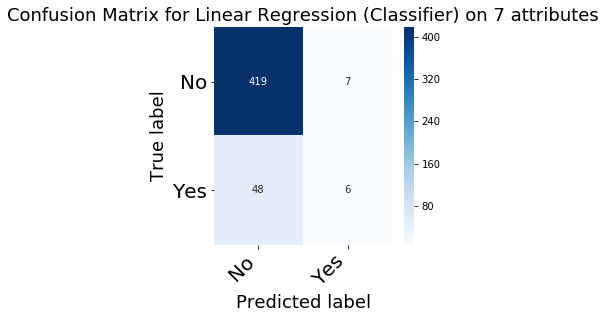

In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix_7_linear = confusion_matrix(Y_test, redwine_7_predicted_linear.round())
df_cm_7_linear = pd.DataFrame(confusion_matrix_7_linear, index=['No', 'Yes'], columns=['No', 'Yes'])
plt.figure(figsize=(4, 4))  
heatmap = sea.heatmap(df_cm_7_linear, annot=True, cmap='Blues', fmt='g')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=20)
plt.ylabel('True label', fontsize=18)
plt.xlabel('Predicted label', fontsize=18)
plt.title('Confusion Matrix for Linear Regression (Classifier) on 7 attributes', fontsize=18)

Text(0.5, 1, 'Confusion Matrix for Linear Regression (Classifier) on 4 attributes')

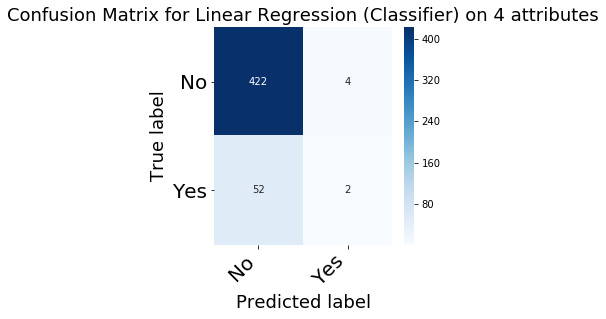

In [16]:
confusion_matrix_4_linear = confusion_matrix(Y_test, redwine_4_predicted_linear.round())
df_cm_4_linear = pd.DataFrame(confusion_matrix_4_linear, index=['No', 'Yes'], columns=['No', 'Yes'])
plt.figure(figsize=(4, 4))  
heatmap = sea.heatmap(df_cm_4_linear, annot=True, cmap='Blues', fmt='g')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=20)
plt.ylabel('True label', fontsize=18)
plt.xlabel('Predicted label', fontsize=18)
plt.title('Confusion Matrix for Linear Regression (Classifier) on 4 attributes', fontsize=18)

In [17]:
from sklearn.metrics import classification_report
print('Classification Report for Linear Regression (Classifier) on 7 attributes: ')
print(classification_report(Y_test, redwine_7_predicted_linear.round()))

total=sum(sum(confusion_matrix_7_linear))
accuracy=(confusion_matrix_7_linear[0,0]+confusion_matrix_7_linear[1,1])/total
sensitivity = confusion_matrix_7_linear[1,1]/(confusion_matrix_7_linear[1,0]+confusion_matrix_7_linear[1,1])
specificity = confusion_matrix_7_linear[0,0]/(confusion_matrix_7_linear[0,0]+confusion_matrix_7_linear[0,1])
recall=confusion_matrix_7_linear[1,1]/(confusion_matrix_7_linear[1,0]+confusion_matrix_7_linear[1,1])
precision=confusion_matrix_7_linear[1,1]/(confusion_matrix_7_linear[0, 1]+confusion_matrix_7_linear[1,1])
fScore=2*(precision*recall)/(precision+recall)

print('Evaluation Metrics for Linear Regression (Classifier): ')
print()
print ('Accuracy : ', accuracy)
print('Sensitivity : ', sensitivity )
print('Specificity : ', specificity)
print('Recall Score : ', recall)
print('Precision: ', precision)
print('F_score: ', fScore)

Classification Report for Linear Regression (Classifier) on 7 attributes: 
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       426
           1       0.46      0.11      0.18        54

    accuracy                           0.89       480
   macro avg       0.68      0.55      0.56       480
weighted avg       0.85      0.89      0.85       480

Evaluation Metrics for Linear Regression (Classifier): 

Accuracy :  0.8854166666666666
Sensitivity :  0.1111111111111111
Specificity :  0.9835680751173709
Recall Score :  0.1111111111111111
Precision:  0.46153846153846156
F_score:  0.17910447761194032


In [18]:
print('Classification Report for Linear Regression (Classifier) on 4 attributes: ')
print(classification_report(Y_test, redwine_4_predicted_linear.round()))

total=sum(sum(confusion_matrix_4_linear))
accuracy=(confusion_matrix_4_linear[0,0]+confusion_matrix_4_linear[1,1])/total
sensitivity = confusion_matrix_4_linear[1,1]/(confusion_matrix_4_linear[1,0]+confusion_matrix_4_linear[1,1])
specificity = confusion_matrix_4_linear[0,0]/(confusion_matrix_4_linear[0,0]+confusion_matrix_4_linear[0,1])
recall=confusion_matrix_4_linear[1,1]/(confusion_matrix_4_linear[1,0]+confusion_matrix_4_linear[1,1])
precision=confusion_matrix_4_linear[1,1]/(confusion_matrix_4_linear[0, 1]+confusion_matrix_4_linear[1,1])
fScore=2*(precision*recall)/(precision+recall)

print('Evaluation Metrics for Linear Regression (Classifier): ')
print()
print ('Accuracy : ', accuracy)
print('Sensitivity : ', sensitivity )
print('Specificity : ', specificity)
print('Recall Score : ', recall)
print('Precision: ', precision)
print('F_score: ', fScore)

Classification Report for Linear Regression (Classifier) on 4 attributes: 
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       426
           1       0.33      0.04      0.07        54

    accuracy                           0.88       480
   macro avg       0.61      0.51      0.50       480
weighted avg       0.83      0.88      0.84       480

Evaluation Metrics for Linear Regression (Classifier): 

Accuracy :  0.8833333333333333
Sensitivity :  0.037037037037037035
Specificity :  0.9906103286384976
Recall Score :  0.037037037037037035
Precision:  0.3333333333333333
F_score:  0.06666666666666667


In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

bayesianModel = GaussianNB()

bayesianModel.fit(redwine_7_training, Y_train)
redwine_7_predicted_NB = bayesianModel.predict(redwine_7_testing)
print('Accuracy score of Naive Bayes on 7 attributes: {}'.format(accuracy_score(Y_test, redwine_7_predicted_NB)))

bayesianModel.fit(redwine_4_training, Y_train)
redwine_4_predicted_NB = bayesianModel.predict(redwine_4_testing)
print('Accuracy score of Naive Bayes on 4 attributes: {}'.format(accuracy_score(Y_test, redwine_4_predicted_NB)))

Accuracy score of Naive Bayes on 7 attributes: 0.8854166666666666
Accuracy score of Naive Bayes on 4 attributes: 0.875


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1, 'Confusion Matrix for Bayesian Model on 7 attributes')

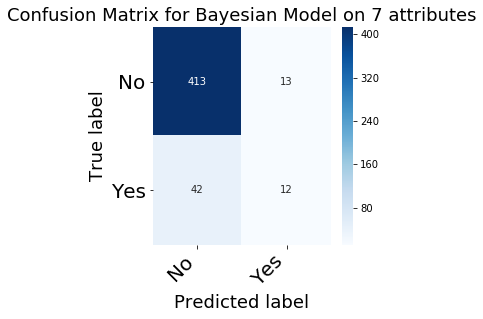

In [20]:
confusion_matrix_7_NB = confusion_matrix(Y_test, redwine_7_predicted_NB)
df_cm_7_NB = pd.DataFrame(confusion_matrix_7_NB, index=['No', 'Yes'], columns=['No', 'Yes'])
plt.figure(figsize=(4, 4))  
heatmap = sea.heatmap(df_cm_7_NB, annot=True, cmap='Blues', fmt='g')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=20)
plt.ylabel('True label', fontsize=18)
plt.xlabel('Predicted label', fontsize=18)
plt.title('Confusion Matrix for Bayesian Model on 7 attributes', fontsize=18)

Text(0.5, 1, 'Confusion Matrix for Bayesian Model on 4 attributes')

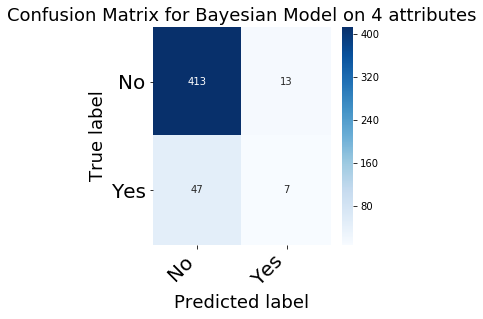

In [21]:
confusion_matrix_4_NB = confusion_matrix(Y_test, redwine_4_predicted_NB)
df_cm_4_NB = pd.DataFrame(confusion_matrix_4_NB, index=['No', 'Yes'], columns=['No', 'Yes'])
plt.figure(figsize=(4, 4))  
heatmap = sea.heatmap(df_cm_4_NB, annot=True, cmap='Blues', fmt='g')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=20)
plt.ylabel('True label', fontsize=18)
plt.xlabel('Predicted label', fontsize=18)
plt.title('Confusion Matrix for Bayesian Model on 4 attributes', fontsize=18)

In [22]:
from sklearn.metrics import classification_report
print('Classification Report for Bayesian Model on 7 attributes: ')
print(classification_report(Y_test, redwine_7_predicted_NB))

total=sum(sum(confusion_matrix_7_NB))
accuracy=(confusion_matrix_7_NB[0,0]+confusion_matrix_7_NB[1,1])/total
sensitivity = confusion_matrix_7_NB[1,1]/(confusion_matrix_7_NB[1,0]+confusion_matrix_7_NB[1,1])
specificity = confusion_matrix_7_NB[0,0]/(confusion_matrix_7_NB[0,0]+confusion_matrix_7_NB[0,1])
recall=confusion_matrix_7_NB[1,1]/(confusion_matrix_7_NB[1,0]+confusion_matrix_7_NB[1,1])
precision=confusion_matrix_7_NB[1,1]/(confusion_matrix_7_NB[0, 1]+confusion_matrix_7_NB[1,1])
fScore=2*(precision*recall)/(precision+recall)

print('Evaluation Metrics for Bayesian Model: ')
print()
print ('Accuracy : ', accuracy)
print('Sensitivity : ', sensitivity )
print('Specificity : ', specificity)
print('Recall Score : ', recall)
print('Precision: ', precision)
print('F_score: ', fScore)

Classification Report for Bayesian Model on 7 attributes: 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       426
           1       0.48      0.22      0.30        54

    accuracy                           0.89       480
   macro avg       0.69      0.60      0.62       480
weighted avg       0.86      0.89      0.87       480

Evaluation Metrics for Bayesian Model: 

Accuracy :  0.8854166666666666
Sensitivity :  0.2222222222222222
Specificity :  0.9694835680751174
Recall Score :  0.2222222222222222
Precision:  0.48
F_score:  0.3037974683544304


In [23]:
from sklearn.metrics import classification_report
print('Classification Report for Bayesian Model on 4 attributes: ')
print(classification_report(Y_test, redwine_4_predicted_NB))

total=sum(sum(confusion_matrix_4_NB))
accuracy=(confusion_matrix_4_NB[0,0]+confusion_matrix_4_NB[1,1])/total
sensitivity = confusion_matrix_4_NB[1,1]/(confusion_matrix_4_NB[1,0]+confusion_matrix_4_NB[1,1])
specificity = confusion_matrix_4_NB[0,0]/(confusion_matrix_4_NB[0,0]+confusion_matrix_4_NB[0,1])
recall=confusion_matrix_4_NB[1,1]/(confusion_matrix_4_NB[1,0]+confusion_matrix_4_NB[1,1])
precision=confusion_matrix_4_NB[1,1]/(confusion_matrix_4_NB[0, 1]+confusion_matrix_4_NB[1,1])
fScore=2*(precision*recall)/(precision+recall)

print('Evaluation Metrics for Bayesian Model: ')
print()
print ('Accuracy : ', accuracy)
print('Sensitivity : ', sensitivity )
print('Specificity : ', specificity)
print('Recall Score : ', recall)
print('Precision: ', precision)
print('F_score: ', fScore)

Classification Report for Bayesian Model on 4 attributes: 
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       426
           1       0.35      0.13      0.19        54

    accuracy                           0.88       480
   macro avg       0.62      0.55      0.56       480
weighted avg       0.84      0.88      0.85       480

Evaluation Metrics for Bayesian Model: 

Accuracy :  0.875
Sensitivity :  0.12962962962962962
Specificity :  0.9694835680751174
Recall Score :  0.12962962962962962
Precision:  0.35
F_score:  0.18918918918918917


In [24]:
from sklearn import svm
from sklearn.metrics import accuracy_score

svc = svm.SVC(kernel='rbf', C=10000.0, gamma=10.0)

svc.fit(redwine_7_training, Y_train)
redwine_7_predicted_SVM = svc.predict(redwine_7_testing)
print('Accuracy score of SVM on 7 attributes: {}'.format(accuracy_score(Y_test, redwine_7_predicted_SVM)))

svc.fit(redwine_4_training, Y_train)
redwine_4_predicted_SVM = svc.predict(redwine_4_testing)
print('Accuracy score of SVM on 4 attributes: {}'.format(accuracy_score(Y_test, redwine_4_predicted_SVM)))

Accuracy score of SVM on 7 attributes: 0.8854166666666666
Accuracy score of SVM on 4 attributes: 0.8854166666666666


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1, 'Confusion Matrix for SVM on 7 attributes')

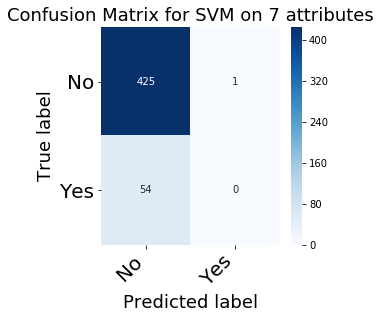

In [25]:
confusion_matrix_7_SVM = confusion_matrix(Y_test, redwine_7_predicted_SVM)
df_cm_7_SVM = pd.DataFrame(confusion_matrix_7_SVM, index=['No', 'Yes'], columns=['No', 'Yes'])
plt.figure(figsize=(4, 4))  
heatmap = sea.heatmap(df_cm_7_SVM, annot=True, cmap='Blues', fmt='g')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=20)
plt.ylabel('True label', fontsize=18)
plt.xlabel('Predicted label', fontsize=18)
plt.title('Confusion Matrix for SVM on 7 attributes', fontsize=18)

Text(0.5, 1, 'Confusion Matrix for SVM on 4 attributes')

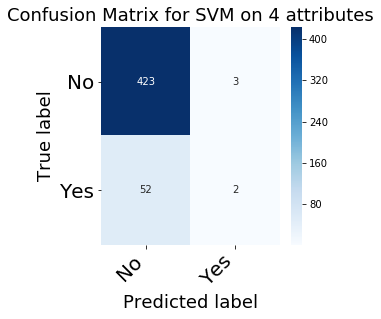

In [26]:
confusion_matrix_4_SVM = confusion_matrix(Y_test, redwine_4_predicted_SVM)
df_cm_4_SVM = pd.DataFrame(confusion_matrix_4_SVM, index=['No', 'Yes'], columns=['No', 'Yes'])
plt.figure(figsize=(4, 4))  
heatmap = sea.heatmap(df_cm_4_SVM, annot=True, cmap='Blues', fmt='g')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=20)
plt.ylabel('True label', fontsize=18)
plt.xlabel('Predicted label', fontsize=18)
plt.title('Confusion Matrix for SVM on 4 attributes', fontsize=18)

In [27]:
from sklearn.metrics import classification_report
print('Classification Report for SVM on 7 attributes: ')
print(classification_report(Y_test, redwine_7_predicted_SVM))

total=sum(sum(confusion_matrix_7_SVM))
accuracy=(confusion_matrix_7_SVM[0,0]+confusion_matrix_7_SVM[1,1])/total
sensitivity = confusion_matrix_7_SVM[1,1]/(confusion_matrix_7_SVM[1,0]+confusion_matrix_7_SVM[1,1])
specificity = confusion_matrix_7_SVM[0,0]/(confusion_matrix_7_SVM[0,0]+confusion_matrix_7_SVM[0,1])
recall=confusion_matrix_7_SVM[1,1]/(confusion_matrix_7_SVM[1,0]+confusion_matrix_7_SVM[1,1])
precision=confusion_matrix_7_SVM[1,1]/(confusion_matrix_7_SVM[0, 1]+confusion_matrix_7_SVM[1,1])
fScore=2*(precision*recall)/(precision+recall)

print('Evaluation Metrics for SVM: ')
print()
print ('Accuracy : ', accuracy)
print('Sensitivity : ', sensitivity )
print('Specificity : ', specificity)
print('Recall Score : ', recall)
print('Precision: ', precision)
print('F_score: ', fScore)

Classification Report for SVM on 7 attributes: 
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       426
           1       0.00      0.00      0.00        54

    accuracy                           0.89       480
   macro avg       0.44      0.50      0.47       480
weighted avg       0.79      0.89      0.83       480

Evaluation Metrics for SVM: 

Accuracy :  0.8854166666666666
Sensitivity :  0.0
Specificity :  0.9976525821596244
Recall Score :  0.0
Precision:  0.0
F_score:  nan


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


In [28]:
from sklearn.metrics import classification_report
print('Classification Report for SVM on 4 attributes: ')
print(classification_report(Y_test, redwine_4_predicted_SVM))

total=sum(sum(confusion_matrix_4_SVM))
accuracy=(confusion_matrix_4_SVM[0,0]+confusion_matrix_4_SVM[1,1])/total
sensitivity = confusion_matrix_4_SVM[1,1]/(confusion_matrix_4_SVM[1,0]+confusion_matrix_4_SVM[1,1])
specificity = confusion_matrix_4_SVM[0,0]/(confusion_matrix_4_SVM[0,0]+confusion_matrix_4_SVM[0,1])
recall=confusion_matrix_4_SVM[1,1]/(confusion_matrix_4_SVM[1,0]+confusion_matrix_4_SVM[1,1])
precision=confusion_matrix_4_SVM[1,1]/(confusion_matrix_4_SVM[0, 1]+confusion_matrix_4_SVM[1,1])
fScore=2*(precision*recall)/(precision+recall)

print('Evaluation Metrics for SVM: ')
print()
print ('Accuracy : ', accuracy)
print('Sensitivity : ', sensitivity )
print('Specificity : ', specificity)
print('Recall Score : ', recall)
print('Precision: ', precision)
print('F_score: ', fScore)

Classification Report for SVM on 4 attributes: 
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       426
           1       0.40      0.04      0.07        54

    accuracy                           0.89       480
   macro avg       0.65      0.51      0.50       480
weighted avg       0.84      0.89      0.84       480

Evaluation Metrics for SVM: 

Accuracy :  0.8854166666666666
Sensitivity :  0.037037037037037035
Specificity :  0.9929577464788732
Recall Score :  0.037037037037037035
Precision:  0.4
F_score:  0.06779661016949153
